In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
df_all = pd.read_csv('fanfic_regression_data_merged_chs.tsv', sep = '\t')

In [3]:
len(df_all)

101002

In [4]:
df_all['Topic_novelty'].head()

0    0.185995
1    0.235195
2    0.518356
3    0.202233
4    0.500391
Name: Topic_novelty, dtype: float64

In [5]:
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.fillna(0)
term_ave = np.average(df_all['Term_novelty'])
topic_ave = np.average(df_all['Topic_novelty'])
df_all['Term_novelty_cent'] = df_all['Term_novelty'] - term_ave
df_all['Topic_novelty_cent'] = df_all['Topic_novelty'] - topic_ave
df_all['Term_novelty_squared'] = np.square(df_all['Term_novelty_cent'])
df_all['Topic_novelty_squared'] = np.square(df_all['Topic_novelty_cent'])

In [6]:
df_all['Topic_novelty_squared'].head()

0    0.010944
1    0.003071
2    0.051869
3    0.007810
4    0.044008
Name: Topic_novelty_squared, dtype: float64

In [7]:
len(df_all)

101002

In [8]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


In [9]:
# df_all = df_all.replace([np.inf, -np.inf], np.nan)
# df_all = df_all.dropna(how = 'any')

In [10]:
# df_all = df_all[['Chapters',\
#         'Term_novelty', 'Term_novelty_squared', 'Topic_novelty', 'Topic_novelty_squared',\
#         'Freq_relationship', 'Category_F_M',\
#        'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
#        'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
#        'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',\
#        'ArchiveWarnings_violence','ArchiveWarnings_noncon',\
#        'author_fic_cnt', 'Rating_G',\
#        'Rating_M', 'Rating_N', 'Rating_T',\
#        'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
#        'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
#        'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
#        'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
#        'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
#        'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
#        'Fandom_ms_paint_adventures', 'Fandom_marvel',
#        'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
#        'History']]

In [11]:
# for i in range(len(df_all.columns.values)):
#     print(df_all.columns.values[i], variance_inflation_factor(df_all.values, i))

### Logistic

In [12]:
df_all.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Words', 'Comments',
       'URL_x', 'Term_novelty', 'Entropy', 'URL_y', 'Topic_novelty',
       'Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
       'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
     

In [13]:
def run_logit(df, field):
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    logit_model = sm.Logit(df['binary'], df[['Chapters',\
        'Term_novelty', 'Term_novelty_squared', 'Topic_novelty', 'Topic_novelty_squared',\
        'Freq_relationship', 'Entropy', 'Chapters', 'Words', 'Category_F_F', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
       'ArchiveWarnings_violence',\
       'author_fic_cnt', 'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T', \
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock', 'History',
        'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [14]:
def run_ols(df, field):
    df = run_logit(df, field)
    df = df[df[field] != 0]
    df['Kudos'] = np.log(df['Kudos'])
    df['Hits'] = np.log(df['Hits'])
    df['Comments'] = np.log(df['Comments'])
    df['Bookmarks'] = np.log(df['Bookmarks'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    model = ols( field + " ~ Term_novelty + Term_novelty_squared + Topic_novelty + Topic_novelty_squared\
 + Chapters + Entropy + Freq_relationship + author_fic_cnt + Words\
 + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
 + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
 ArchiveWarnings_choose_no +\
 ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
 + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
 Fandom_supernatural + Fandom_haikyuu + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
 + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
 + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
 Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
 Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock + nonzero_prob", data = df).fit()
    return model

In [15]:
df_all.head()

,Bookmarks,Chapters,Hits,Kudos,Words,Comments,URL_x,Term_novelty,Entropy,URL_y,...,Fandom_ms_paint_adventures,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History,Term_novelty_cent,Topic_novelty_cent,Term_novelty_squared,Topic_novelty_squared
0,21,24,2399.0,53.0,66258.0,16,http://archiveofourown.org/works/488677/chapte...,0.444622,5.318853,http://archiveofourown.org/works/488677/chapte...,...,0,0,0,0,0,3842.0,0.053965,-0.104615,0.002912,0.010944
1,7,1,2333.0,80.0,3542.0,3,http://archiveofourown.org/works/208853?view_a...,0.399930,5.704787,http://archiveofourown.org/works/208853?view_a...,...,0,0,0,0,0,3847.0,0.009272,-0.055415,0.000086,0.003071
2,1,1,200.0,21.0,837.0,0,http://archiveofourown.org/works/1644146,0.486395,4.711733,http://archiveofourown.org/works/1644146,...,0,0,0,0,0,3849.0,0.095738,0.227747,0.009166,0.051869
3,14,2,1635.0,115.0,15774.0,4,http://archiveofourown.org/works/967862/chapte...,0.399916,5.775471,http://archiveofourown.org/works/967862/chapte...,...,0,0,0,0,0,3851.0,0.009258,-0.088377,0.000086,0.007810
4,5,1,2560.0,103.0,781.0,3,http://archiveofourown.org/works/1649069?view_...,0.386655,5.130537,http://archiveofourown.org/works/1649069?view_...,...,0,0,0,0,0,3838.0,-0.004002,0.209781,0.000016,0.044008


### Plot coefficients

In [16]:
kudos_model = run_ols(df_all, 'Kudos')
kudos_coef = np.asarray(list(kudos_model.params)[1:-1])
kudos_err = list(kudos_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.045398
         Iterations: 35
         Function evaluations: 74
         Gradient evaluations: 60


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs,

In [17]:
# ~ Term_novelty + Term_novelty_squared + Topic_novelty + Topic_novelty_squared\
#  + Chapters + Entropy + Freq_relationship + author_fic_cnt + Words\
#  + Category_Gen + Category_F_F + Category_F_M + Category_M_M + Category_Multi + Category_Other  \
#  + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
#  ArchiveWarnings_choose_no +\
#  ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
#  + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
#  Fandom_supernatural + Fandom_haikyuu + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
#  + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
#  + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
#  Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
#  Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock + nonzero_prob

In [18]:
hits_model = run_ols(df_all, 'Hits')
hits_coef = list(hits_model.params)[1:-1]
hits_err = list(hits_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:

         Current function value: 0.121377
         Iterations: 35
         Function evaluations: 74
         Gradient evaluations: 60


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [19]:
comments_model = run_ols(df_all, 'Comments')
comments_coef = list(comments_model.params)[1:-1]
comments_err = list(comments_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/s

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


In [20]:
bookmarks_model = run_ols(df_all, 'Bookmarks')
bookmarks_coef = list(bookmarks_model.params)[1:-1]
bookmarks_err = list(bookmarks_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/s

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


In [29]:
ylabels =['Term novelty', 'Term novelty squared', 'Topic novelty', 'Topic novelty squared', 'Chapters', \
 'Entropy', 'Frequent relationship',' Author work count', 'Words',\
 'Category (General)','Category (Female/Female)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)',\
 'ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
 ArchiveWarnings (Non-consensual sex)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)',\
 ' Fandom (DCU) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
  'Fandom (Supernatural)','Fandom (Haikyuu)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
 ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
 ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
 Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]

In [36]:
def plot_ax(ax, coef, err, top_tail_option, xlim_left, xlim_right, xlabel='', ylabel_flag=False):
    
    ax.errorbar(coef[::-1], range(len(coef)), xerr=err[::-1] , fmt='o', label=top_tail_option)
    ax.set_yticks(range(len(ylabels)))
    if ylabel_flag:
        ax.set_yticklabels(ylabels)
    else:
        ax.set_yticklabels([])

    ax.plot([0 for i in range(len(coef)+2)], range(-1,len(coef)+1), c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    ax.set_ylim(-0.5,len(ylabels))
    ax.set_xlim(xlim_left,xlim_right)
    if xlabel != '':
        ax.set_xlabel(xlabel, fontsize=15)
    # ax[0].set_title('R-squared = 0.256', fontsize=15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    ax.legend()

In [37]:
len(kudos_coef), len(ylabels)

(46, 46)

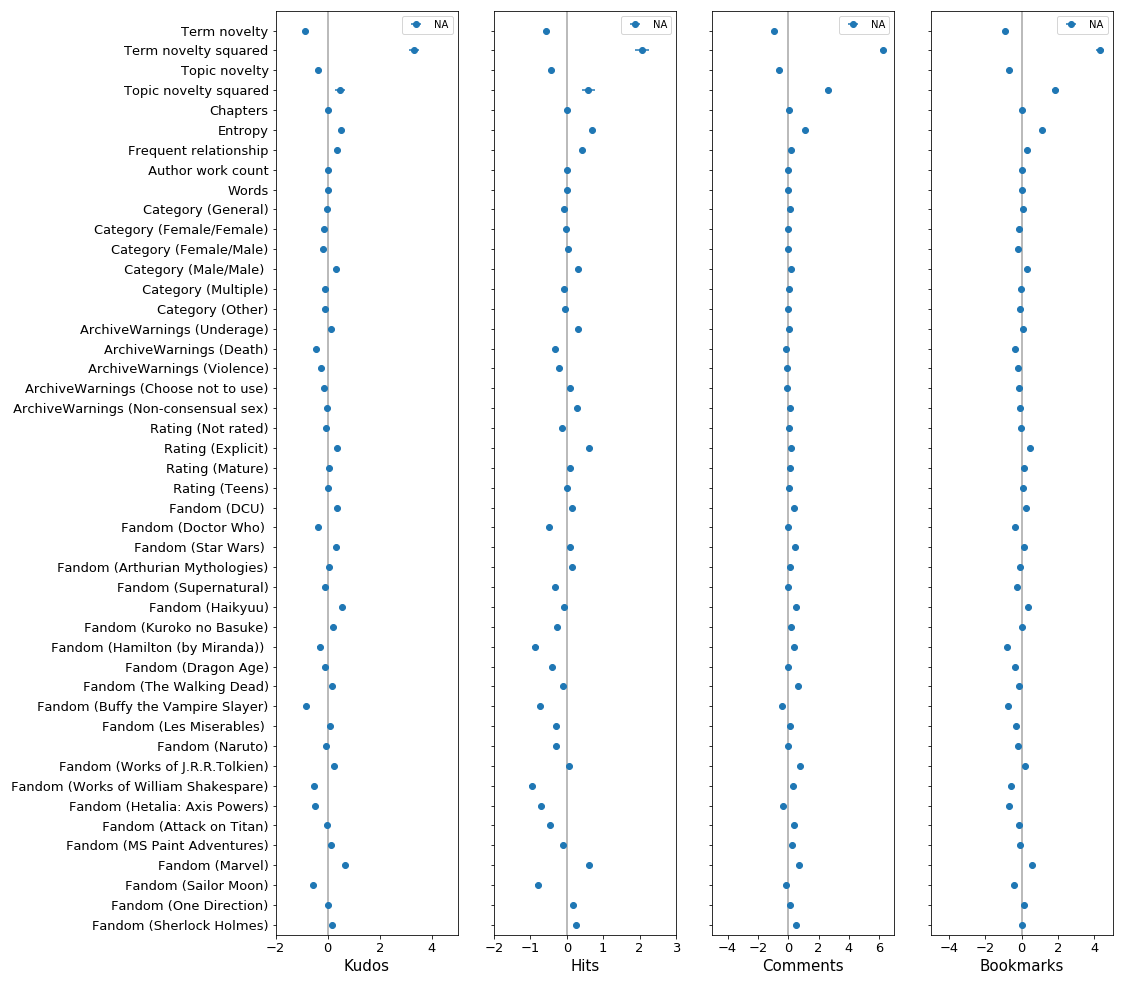

In [45]:
fig, ax = plt.subplots(1,4,figsize = (15,17))
plot_ax(ax=ax[0], coef=kudos_coef, err=kudos_err, xlim_left=-2, xlim_right=5, top_tail_option='NA', xlabel='Kudos', ylabel_flag=True)

plot_ax(ax=ax[1], coef=hits_coef, err=hits_err, xlabel='Hits', xlim_left=-2, xlim_right=3, top_tail_option='NA')

plot_ax(ax=ax[2], coef=comments_coef, err=comments_err, xlim_left=-5, xlim_right=7, xlabel='Comments', ylabel_flag=False, top_tail_option='NA')

plot_ax(ax=ax[3], coef=bookmarks_coef, err=bookmarks_err, xlim_left=-5, xlim_right=5, xlabel='Bookmarks', ylabel_flag=False, top_tail_option='NA')

# plt.savefig('ols_coefs_topic_novelty.pdf', format='pdf')

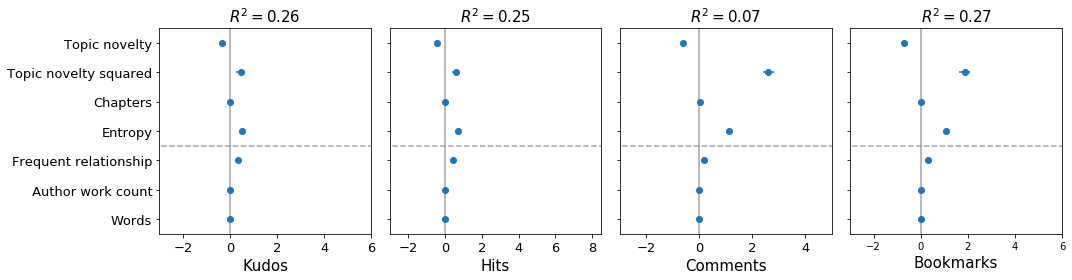

In [39]:
fig, ax = plt.subplots(1,4,figsize = (15,4))
ax[0].errorbar(kudos_coef[::-1], range(len(kudos_coef)), xerr=kudos_err[::-1] , fmt='o')

ax[0].set_yticks(range(len(kudos_coef)))
ax[0].set_yticklabels(ylabels)
ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[0].set_ylim(36.5,43.5)
ax[0].set_xlim(-3,6)
ax[0].set_xlabel('Kudos', fontsize=15)
ax[0].set_title('$R^2 = 0.26$', fontsize=15)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[1].errorbar(hits_coef[::-1], range(len(hits_err)), xerr=hits_err[::-1], fmt='o')
ax[1].set_yticks(range(len(hits_coef)))
# ax[1].set_yticklabels(ylabels)
ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7, ls='dashed')
ax[1].set_ylim(36.5,43.5)
ax[1].set_xlim(-3,8.5)
ax[1].set_yticklabels([])
ax[1].set_title('$R^2 = 0.25$', fontsize=15)
ax[1].set_xlabel('Hits', fontsize=15)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[2].errorbar(comments_coef[::-1], range(len(comments_err)), xerr=comments_err[::-1], fmt='o')
ax[2].set_yticks(range(len(comments_coef)))
ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[2].set_ylim(36.5,43.5)
ax[2].set_xlim(-3,5)
ax[2].set_yticklabels([])
ax[2].set_title('$R^2 = 0.07$', fontsize=15)
ax[2].set_xlabel('Comments', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax[3].errorbar(bookmarks_coef[::-1], range(len(bookmarks_err)), xerr=bookmarks_err[::-1], fmt='o')
ax[3].set_yticks(range(len(bookmarks_coef)))
ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[3].set_ylim(36.5,43.5)
ax[3].set_xlim(-3,6)
ax[3].set_yticklabels([])
ax[3].set_title('$R^2 = 0.27$', fontsize=15)
ax[3].set_xlabel('Bookmarks', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
# fig.text(0.55, 0.001, 'N = 609716', fontsize = 15)
plt.tight_layout()
plt.savefig('ols_coefs_partial_twoparts.pdf', format='pdf')

In [28]:
print(kudos_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     501.2
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:57:50   Log-Likelihood:                -88891.
No. Observations:               64301   AIC:                         1.779e+05
Df Residuals:                   64253   BIC:                         1.783e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [44]:
print(hits_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     725.2
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:05:37   Log-Likelihood:                -86397.
No. Observations:               64301   AIC:                         1.729e+05
Df Residuals:                   64253   BIC:                         1.733e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [43]:
print(comments_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Comments   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     603.4
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:05:35   Log-Likelihood:                -93399.
No. Observations:               64301   AIC:                         1.869e+05
Df Residuals:                   64254   BIC:                         1.873e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [27]:
print(bookmarks_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Bookmarks   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     2362.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        16:44:44   Log-Likelihood:            -4.4436e+05
No. Observations:              287139   AIC:                         8.888e+05
Df Residuals:                  287093   BIC:                         8.893e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [27]:
# fig = plt.figure(figsize=(20,20))
# fig = sm.graphics.plot_regress_exog(kudos_model, "Term_novelty", fig=fig)
# plt.savefig('partial_reg_plots_term_novelty.png', format='png')